<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/BoostingClassifiersV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hyperparameter Optimization Techniques and Libraries

 When businesses use machine learining models—like predicting customer demand or likely buyers, the model learns from data. But it has some settings, called hyperparameters, that aren’t learned from the data. These are things like how fast the model learns, how complex it gets, or how many times it reviews the data. The process of tweaking these settings to make the model perform better (e.g., more accurate predictions or faster results) is called hyperparameter tuning.

 What Is Hyperparameter Tuning?

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us which can be manipulated according to programmer wish. Machine learning algorithms never learn these parameters. These are tuned so that we could get good performance by the model. Hyperparameter tuning aims to find such parameters where the performance of the model is highest or where the model performance is best and the error rate is least.

Steps for Hyperparameter Tuning

1)Pick Your Model: Choose the type of machine learning model you’ll use (e.g., a decison tree or catboost).
Example: For forecasting sales, you might pick a regression model.

2)List the Parameters: Identify the hyperparameters you can adjust in that model (e.g., learning rate, number of trees).
Example: In a decision tree, you might tweak the depth of the tree.

3)Choose a Search Method: Decide how you’ll test different hyperparameter values (e.g., Grid Search or Random Search).
Example: Random Search might save time if you have lots of options.

4)Set Up Cross-Validation: Split your data into parts to test the model fairly and avoid overfitting.
Example: Use 5-fold cross-validation to check performance on different data chunks.

5)Check the Results: Use a score (like accuracy or error rate) to see how well the model works.
Example: Pick the settings with the highest accuracy score.



1.Grid Search – Tries every possible combination of parameters.

✅ Pros: Comprehensive and reliable.
❌ Cons: Can be slow with many options.
📌 Business Example: Predicting quarterly profits using all set of options.


2.Random Search – Selects random parameter combinations to test.

✅ Pros: Faster than Grid Search.
❌ Cons: Might miss the best combination.
📌 Business Example: Predicting quarterly profits using random set of options.

3.Bayesian Optimization – Uses previous results to make smart guesses about better parameter values.

✅ Pros: Efficient for large, complex problems.
❌ Cons: More complex to set up.
📌 Business Example: Fine-tuning a machine learning model for sales forecast

4.Gradient-Based Optimization – Uses mathematical techniques to refine parameters based on their impact.

✅ Pros: Precise for optimizing complex models.
❌ Cons: Requires significant computing resources.
📌 Business Example: For guven return minimize stock portfolio risk by fine-tuning risk-adjusted investment strategies.

5.Ensemble-Based Optimization – Combines multiple models to get a better overall result.

✅ Pros: More reliable predictions.
❌ Cons: Requires training multiple models, which is time-consuming.
📌 Business Example: Predicting economic recessions by combining data from different financial models.

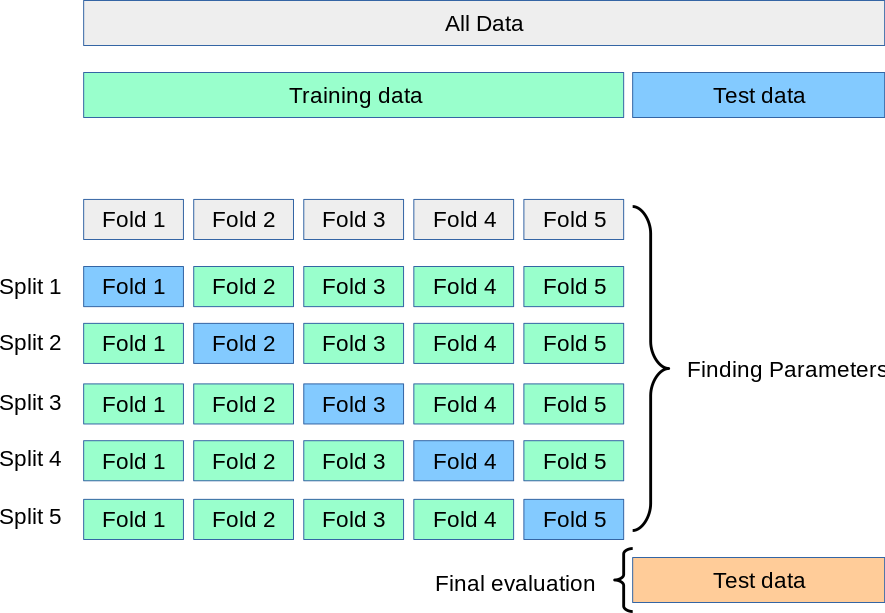

In [1]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
X=df.drop(["State", "Churn"], axis=1)


In [2]:
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [3]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [4]:
 #Number of feaures(input) for X
 X.shape[1]

18

Grid Search CV

In [8]:
#We can not choose model based on test data.
#Random Forest CV
%%time
from time import time
t0=time()
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier # This line was added

forest_params = {"max_depth": range(5, X.shape[1],3), "max_features": range(5, X.shape[1],3)}

forest = RandomForestClassifier(random_state=17 )
forest_grid = GridSearchCV(forest, forest_params, cv=3, n_jobs=-1, verbose=True)
forest_grid.fit(X,y)

print(forest_grid.best_params_, forest_grid.best_score_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 14, 'max_features': 5} 0.9540954095409542
CPU times: user 1.3 s, sys: 81.3 ms, total: 1.38 s
Wall time: 1min 1s


Random Search CV

In [7]:
%%time
from time import time
t0=time()
#Import the RandomForestClassifier class from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier # This line was added

from sklearn.model_selection import RandomizedSearchCV, cross_val_score
rf_params = {"max_depth": range(5, X.shape[1],3), "max_features": range(5, X.shape[1],3)}

forest = RandomForestClassifier(random_state=17 )
forest_grid = RandomizedSearchCV(forest, rf_params, cv=3, n_jobs=-1, verbose=True)
forest_grid.fit(X,y)

print(forest_grid.best_params_, forest_grid.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'max_features': 5, 'max_depth': 17} 0.9519951995199519
CPU times: user 1.42 s, sys: 115 ms, total: 1.54 s
Wall time: 33.5 s


Compare the result with random seach and grid search in terms of time and best score?


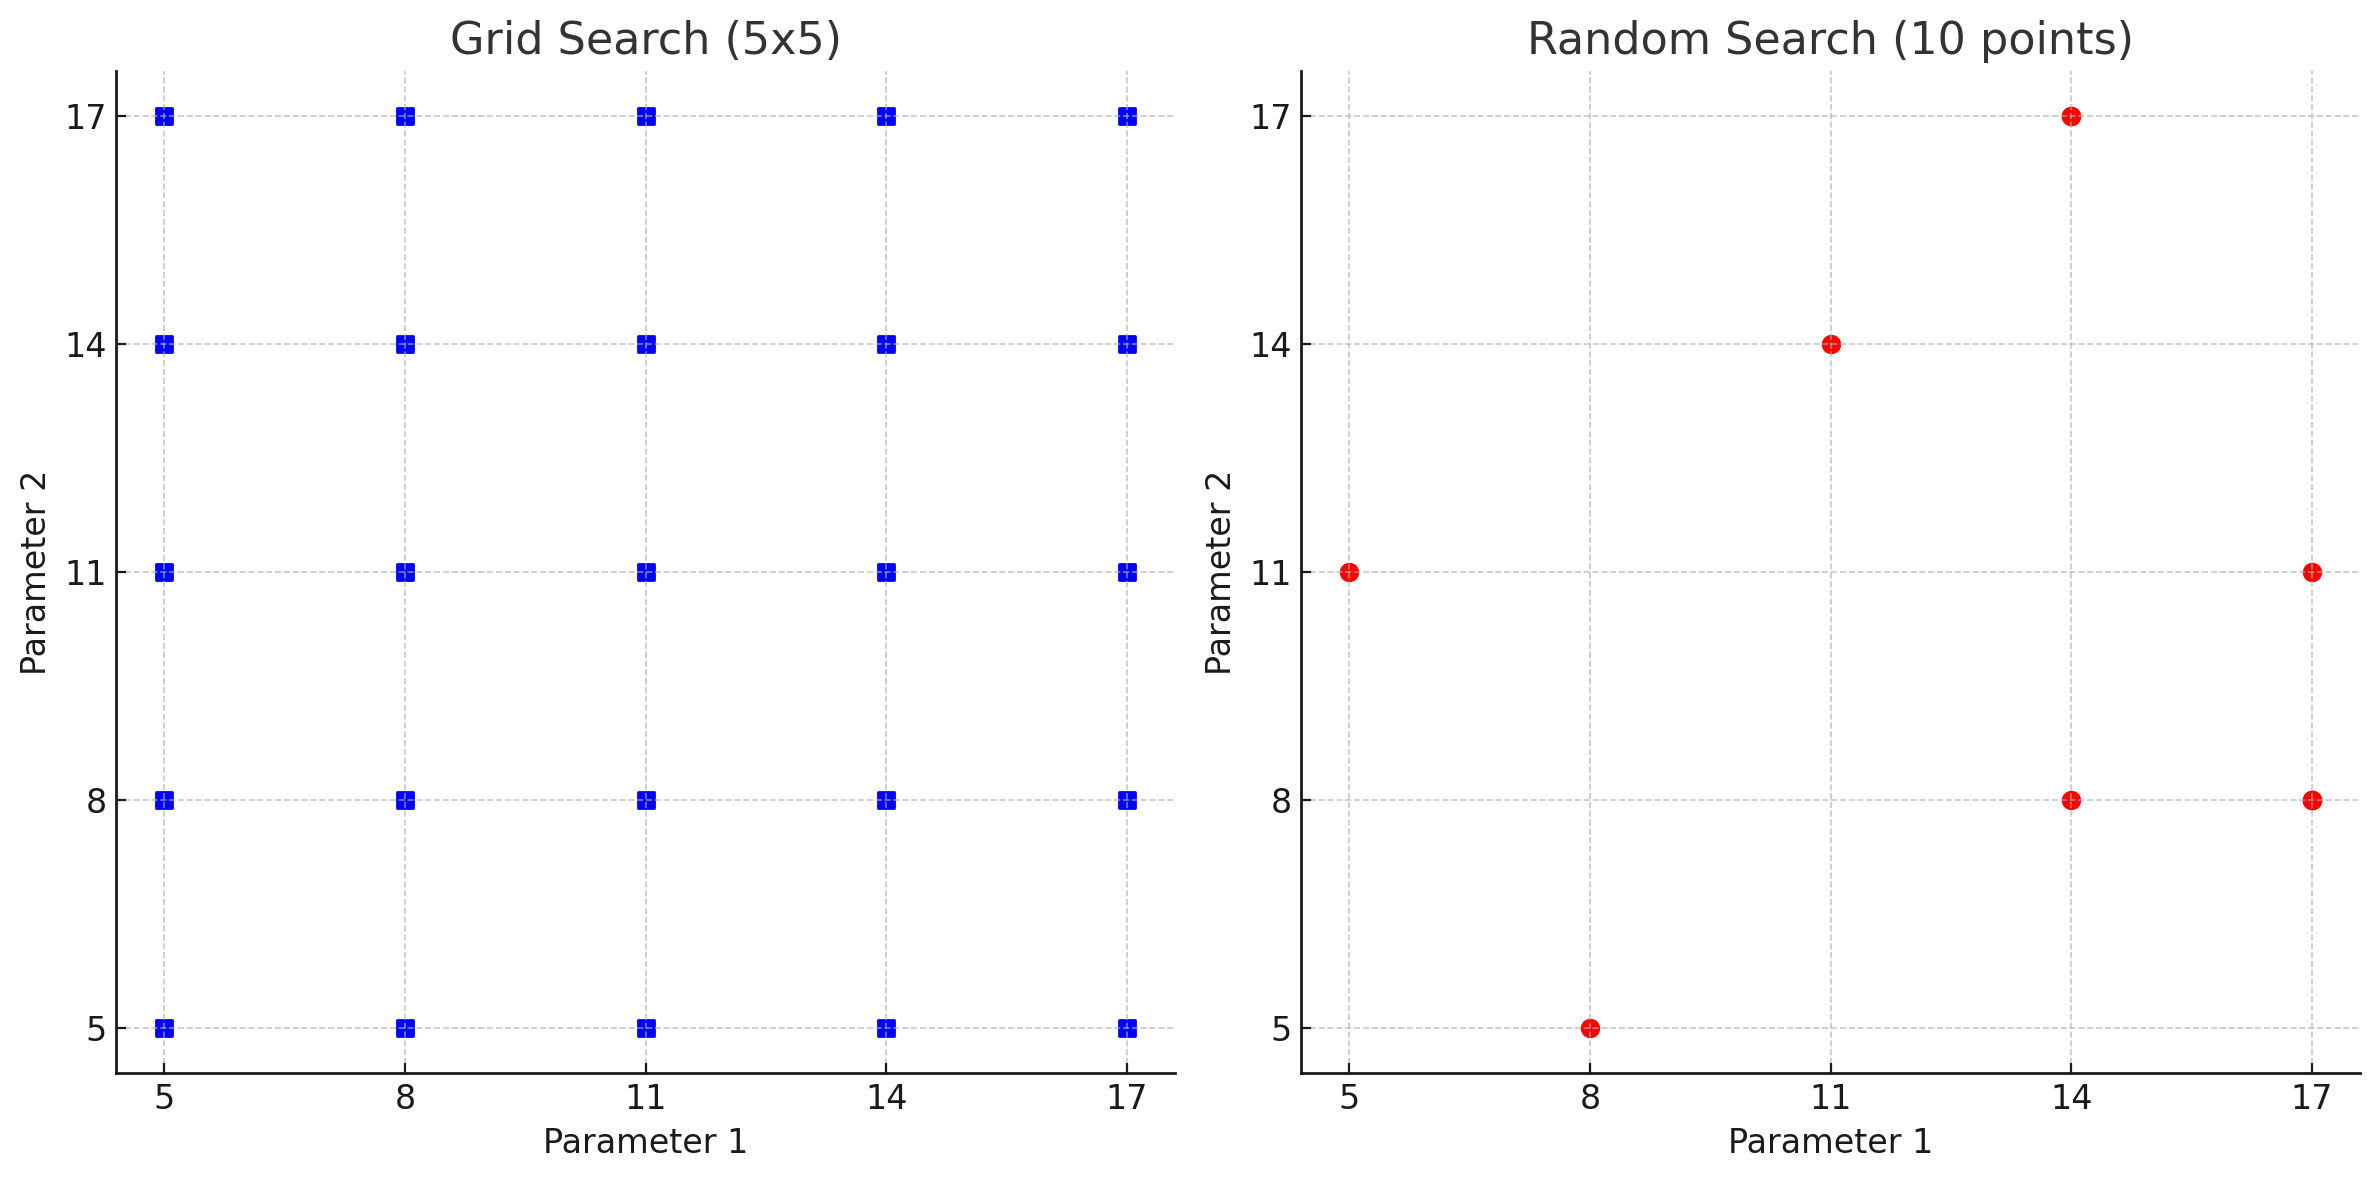

In [ ]:
#XGBoost CV
# XGBoost
%%time
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV, cross_val_score
xgb_params = {"max_depth": range(5, X.shape[1],3), "learning_rate": np.arange(0.1, 1, 0.2)}
xgbm = XGBClassifier(random_state=17)
xgb_grid = GridSearchCV(xgbm, xgb_params , cv=3, n_jobs=-1, verbose=True)
xgb_grid.fit(X,y)

print(xgb_grid.best_params_, xgb_grid.best_score_)



Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'learning_rate': 0.1, 'max_depth': 14} 0.9558955895589559
CPU times: user 1.32 s, sys: 40.3 ms, total: 1.36 s
Wall time: 16.4 s


In [ ]:
xgbm.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=17, ...)>

In [9]:
#Light GBM CV
%%time
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score
lgb_params = {"max_depth": range(5, X.shape[1],3), "learning_rate": np.arange(0.1, 1, 0.2)}
lgbm = lgb.LGBMClassifier(random_state=17)
lgb_grid = GridSearchCV(lgbm, lgb_params , cv=3, n_jobs=-1, verbose=True)
lgb_grid.fit(X,y)

print(lgb_grid.best_params_, lgb_grid.best_score_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 483, number of negative: 2850
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2413
[LightGBM] [Info] Number of data points in the train set: 3333, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144914 -> initscore=-1.775058
[LightGBM] [Info] Start training from score -1.775058
{'learning_rate': 0.30000000000000004, 'max_depth': 14} 0.9570957095709572
CPU times: user 3.07 s, sys: 1.9 s, total: 4.96 s
Wall time: 18.4 s


In [10]:
#Gradient Based CV
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
lgb_params = {"max_depth": range(5, X.shape[1],3), "learning_rate": np.arange(0.1, 1, 0.2)}
gbm_model = GradientBoostingClassifier(random_state=17)
gbm_grid = GridSearchCV(gbm_model , lgb_params , cv=3, n_jobs=-1, verbose=True)
gbm_grid.fit(X,y)

print(gbm_grid.best_params_, gbm_grid.best_score_)




Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'learning_rate': 0.5000000000000001, 'max_depth': 8} 0.9534953495349535
CPU times: user 4.34 s, sys: 141 ms, total: 4.49 s
Wall time: 2min 7s


{'max_depth': 14, 'max_features': 5} 0.95409540954095420.9558955895589559-Random Forest

{'learning_rate': 0.1, 'max_depth': 14} 0.9558955895589559-XGBOOST

{'learning_rate': 0.30000000000000004, 'max_depth': 14} 0.9570957095709572-light GBM

{'learning_rate': 0.5000000000000001, 'max_depth': 8} 0.9534953495349535- GBM


In [ ]:
#Which model give  the highest CV


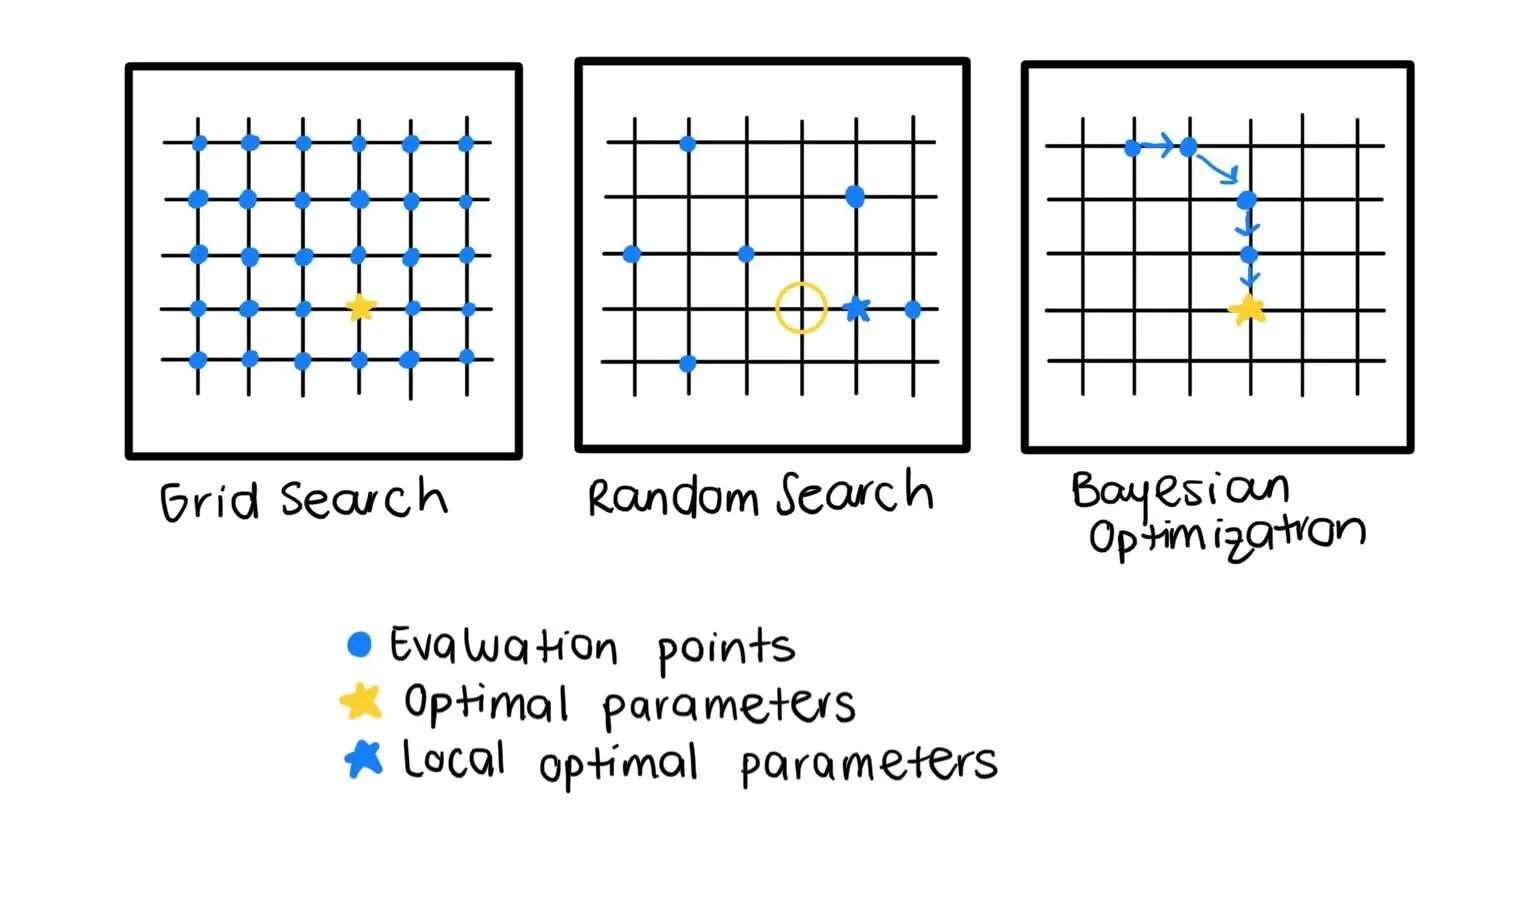

Some of the popular libraries for hyper paramater optimization are optuna or hyperopt . You can check following link for comparison of two methods.

https://neptune.ai/blog/optuna-vs-hyperopt


By default, Optuna implements a Bayesian optimization algorithm named Tree-structured Parzen Estimator(TPE) but it can be easily switched to other existing algorithms in the package. The some of the other algorithms used by Optuna  are Grid Search, Random Search, CMA-ES based algortihm, Quasi Monte Carlo sampling algorithm  and Genetic Algorithm.

In [11]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.2 MB/s eta 0:00:00


In [13]:
# Minimize (x - 2) ** 2 if x is between ( -10, 10)
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=50)

print(study.best_params) # E.g. {'x': 2.002108042}
print(study.best_trial)

[I 2025-03-04 07:08:20,720] A new study created in memory with name: no-name-7a86d623-4082-4635-b4c6-ec22a96f7998
[I 2025-03-04 07:08:20,725] Trial 0 finished with value: 16.533353157398725 and parameters: {'x': -2.0661226195724502}. Best is trial 0 with value: 16.533353157398725.
[I 2025-03-04 07:08:20,730] Trial 1 finished with value: 48.83642718789268 and parameters: {'x': 8.988306460645003}. Best is trial 0 with value: 16.533353157398725.
[I 2025-03-04 07:08:20,735] Trial 2 finished with value: 0.24295314827664358 and parameters: {'x': 1.5070972222875554}. Best is trial 2 with value: 0.24295314827664358.
[I 2025-03-04 07:08:20,740] Trial 3 finished with value: 4.471494393688637 and parameters: {'x': -0.11459083363392963}. Best is trial 2 with value: 0.24295314827664358.
[I 2025-03-04 07:08:20,754] Trial 4 finished with value: 0.8734429333685877 and parameters: {'x': 2.934581688975655}. Best is trial 2 with value: 0.24295314827664358.
[I 2025-03-04 07:08:20,755] Trial 5 finished wit

{'x': 2.0542032450211223}
FrozenTrial(number=32, state=1, values=[0.0029379917708198173], datetime_start=datetime.datetime(2025, 3, 4, 7, 8, 21, 270353), datetime_complete=datetime.datetime(2025, 3, 4, 7, 8, 21, 301819), params={'x': 2.0542032450211223}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=32, value=None)


In [14]:
# Maximize (x - 2) ** 2 if x is between ( -10, 10)
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study(direction="maximize")#We specify this is maximization problem
study.optimize(objective, n_trials=100)

print(study.best_params) # E.g. {'x':- 9.992108042}
print(study.best_trial)

[I 2025-03-04 07:09:28,393] A new study created in memory with name: no-name-013ac582-f85a-418e-a353-98281edfae06
[I 2025-03-04 07:09:28,396] Trial 0 finished with value: 14.01926652605237 and parameters: {'x': 5.744231099445168}. Best is trial 0 with value: 14.01926652605237.
[I 2025-03-04 07:09:28,397] Trial 1 finished with value: 1.3626662723297114 and parameters: {'x': 3.167332974060834}. Best is trial 0 with value: 14.01926652605237.
[I 2025-03-04 07:09:28,399] Trial 2 finished with value: 36.33556404749199 and parameters: {'x': 8.027898808663927}. Best is trial 2 with value: 36.33556404749199.
[I 2025-03-04 07:09:28,399] Trial 3 finished with value: 60.16152854596927 and parameters: {'x': -5.7563863071645205}. Best is trial 3 with value: 60.16152854596927.
[I 2025-03-04 07:09:28,402] Trial 4 finished with value: 24.829557355471174 and parameters: {'x': -2.982926585398502}. Best is trial 3 with value: 60.16152854596927.
[I 2025-03-04 07:09:28,403] Trial 5 finished with value: 8.88

{'x': -9.99796732624873}
FrozenTrial(number=83, state=1, values=[143.9512199617321], datetime_start=datetime.datetime(2025, 3, 4, 7, 9, 28, 873326), datetime_complete=datetime.datetime(2025, 3, 4, 7, 9, 28, 878596), params={'x': -9.99796732624873}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=83, value=None)


In [15]:
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):


    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         max_depth = trial.suggest_int("max_depth", 2,X.shape[1])
         max_features = trial.suggest_int("max_features", 2,X.shape[1])
         classifier_obj = sklearn.ensemble.RandomForestClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         max_depth = trial.suggest_int("max_depth", 2,X.shape[1])
         learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9,step=0.2)
         classifier_obj = XGBClassifier(random_state=17,  max_depth=max_depth, learning_rate=learning_rate )



    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         max_depth = trial.suggest_int("max_depth", 2,X.shape[1])
         learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9,step=0.2)
         classifier_obj = lgb.LGBMClassifier(random_state=17,  max_depth=max_depth, learning_rate=learning_rate )



    else:
         max_depth = trial.suggest_int("max_depth", 2,X.shape[1])
         learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9,step=0.2)
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(random_state=17,  learning_rate=learning_rate )



    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3).mean()

    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2025-03-04 07:12:24,069] A new study created in memory with name: no-name-6bd48c16-e343-4ece-85d6-3ed7a84f04c0
[I 2025-03-04 07:12:27,111] Trial 0 finished with value: 0.9534953495349535 and parameters: {'classifier': 'XGBoost', 'max_depth': 13, 'learning_rate': 0.1}. Best is trial 0 with value: 0.9534953495349535.
[I 2025-03-04 07:12:28,498] Trial 1 finished with value: 0.9516951695169517 and parameters: {'classifier': 'Random Forest', 'max_depth': 11, 'max_features': 4}. Best is trial 0 with value: 0.9534953495349535.
[I 2025-03-04 07:12:28,963] Trial 2 finished with value: 0.9516951695169517 and parameters: {'classifier': 'XGBoost', 'max_depth': 15, 'learning_rate': 0.30000000000000004}. Best is trial 0 with value: 0.9534953495349535.
[I 2025-03-04 07:12:29,902] Trial 3 finished with value: 0.9297929792979298 and parameters: {'classifier': 'Random Forest', 'max_depth': 14, 'max_features': 2}. Best is trial 0 with value: 0.9534953495349535.
[I 2025-03-04 07:12:32,998] Trial 4 fini

FrozenTrial(number=26, state=1, values=[0.9570957095709572], datetime_start=datetime.datetime(2025, 3, 4, 7, 12, 53, 456043), datetime_complete=datetime.datetime(2025, 3, 4, 7, 12, 53, 857747), params={'classifier': 'LightGBM', 'max_depth': 14, 'learning_rate': 0.30000000000000004}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntDistribution(high=18, log=False, low=2, step=1), 'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=0.2)}, trial_id=26, value=None)


In [16]:
#Print Best Model
print(study.best_params)
print(study.best_value)

{'classifier': 'LightGBM', 'max_depth': 14, 'learning_rate': 0.30000000000000004}
0.9570957095709572
